In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
from tqdm import tqdm

from utils import *

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
import seaborn as sns

100%|██████████| 2000/2000 [00:11<00:00, 170.40it/s]


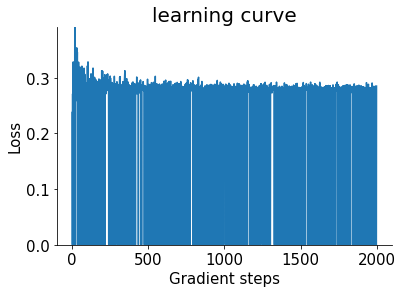

In [2]:
# torch.manual_seed(12)

# Initialize RNN
input_size = 2
output_size = 2
fbi_size = 2
bias = False

model = FBI_RNN(input_size, output_size, fbi_size,bias)


# Train network
num_epochs = 2000
num_timesteps = 9
eval_step = 8
num_BPTT_steps = 3 #how many steps in the past to backpropagate the error
lr = 0.01
all_patterns = torch.tensor([[0., 1.],[1., 0.],[1., 1.],[0., 0.]])

output_history, fbi_history, loss_history, weight_history = model.train(num_epochs, num_timesteps, num_BPTT_steps, eval_step, all_patterns, lr)

data = [all_patterns, output_history, fbi_history, loss_history, weight_history]

plt.plot(loss_history)
plt.xlabel('Gradient steps')
plt.ylabel('Loss')
plt.ylim([0,torch.max(loss_history)])
plt.title('learning curve',fontsize=20)
sns.despine()
plt.show()

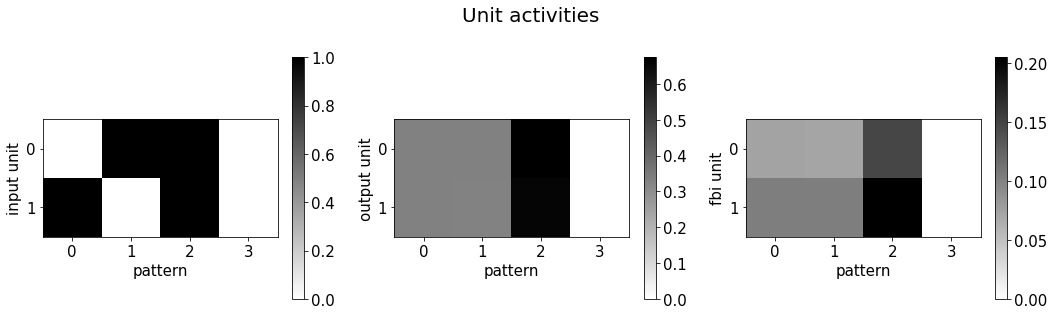

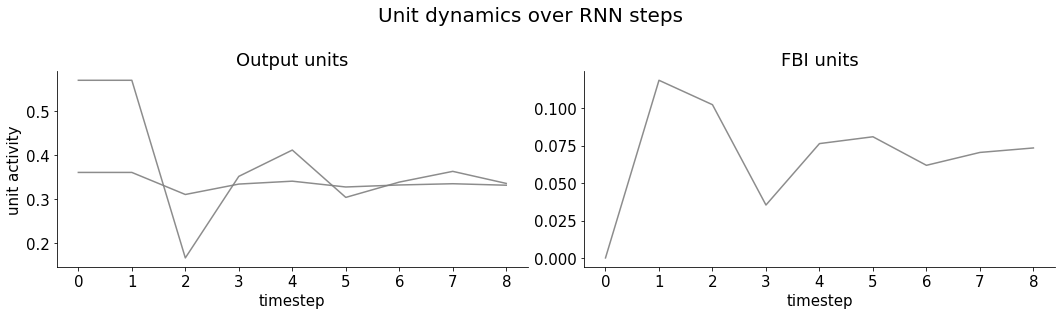

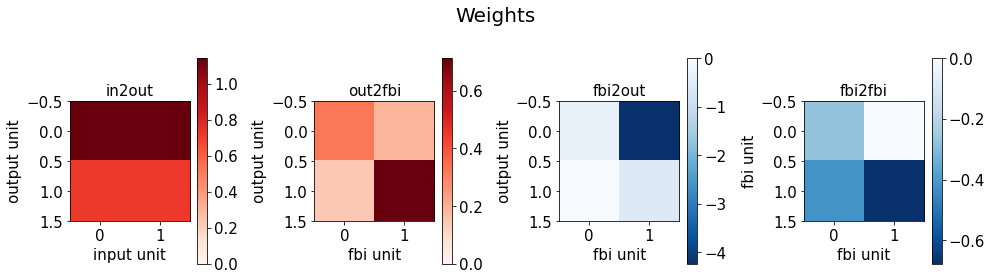

In [3]:
epoch = -1
time = eval_step
plot_activity(time,epoch,data)
# print(f'bias = {model.in2out.bias.detach()}')

In [4]:
epoch = -1
time = eval_step

def plot_activity(time):
    fig, ax = plt.subplots(1,3,figsize=(15,4.5))
    axis = 0
    im = ax[axis].imshow(all_patterns.T,aspect='equal',cmap='gray_r')
    plt.colorbar(im, ax=ax[axis])
    ax[axis].set_xlabel('pattern')
    ax[axis].set_ylabel('input unit')

    axis = 1
    im = ax[axis].imshow(output_history[:,time,:,epoch],aspect='equal',vmin=0,cmap='gray_r')
    plt.colorbar(im, ax=ax[axis])
    ax[axis].set_xlabel('pattern')
    ax[axis].set_ylabel('output unit')

    axis = 2
    im = ax[axis].imshow(fbi_history[:,time,:,epoch],aspect='equal',vmin=0,cmap='gray_r')
    plt.colorbar(im, ax=ax[axis])
    ax[axis].set_xlabel('pattern')
    ax[axis].set_ylabel('fbi unit')

    plt.suptitle("Unit activities",fontsize=20)
    plt.tight_layout()
    plt.show()
    
import ipywidgets as widgets

widgets.interact(plot_activity, time=(0,num_timesteps-1,1));
# widgets.interact(plot_activity, epoch=widgets.Play(min=1,max=80));# print(f'bias = {model.in2out.bias.detach()}')

interactive(children=(IntSlider(value=4, description='time', max=8), Output()), _dom_classes=('widget-interact…

In [5]:
model = FBI_RNN(input_size, output_size, fbi_size,bias=True)
plot_loss_landscape(model, XOR)

/Users/ag1880/opt/anaconda3/lib/python3.8/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


AttributeError: 'FBI_RNN' object has no attribute 'num_timesteps'